In [2]:
!git clone https://github.com/shreyaspj20/Music-recommendation-system.git

Cloning into 'Music-recommendation-system'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 121 (delta 41), reused 32 (delta 9), pack-reused 32
Receiving objects: 100% (121/121), 115.68 MiB | 25.73 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('data.csv.zip',compression='zip')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [5]:

data.drop_duplicates(inplace=True,subset=['name'])

In [6]:
name=data['name']

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
col_features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=5,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_

In [9]:
data['song_name']=name

In [10]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2,Singende Bataillone 1. Teil
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4,"Fantasiestücke, Op. 111: Più tosto lento"
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,2,Chapter 1.18 - Zamek kaniowski
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,2,Bebamos Juntos - Instrumental (Remasterizado)
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,4,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,167845,0.7020,1,0j2CNrgtalXRGIvHMO2vzh,0.000000,7,0.1200,-6.255,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.3380,2020,0,Letter To Nipsey (feat. Roddy Ricch)
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020,3,Ojos De Maniaco
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,1,Skechers (feat. Tyga) - Remix
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,1,Sweeter (feat. Terrace Martin)


In [11]:
cluster=data.groupby(by=data['kmeans'])
print(cluster)

In [12]:
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song_name'])

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [15]:
model.score(x_train,y_train)


0.9994283135248985

In [16]:
model.score(x_test,y_test)

0.9910937264931549

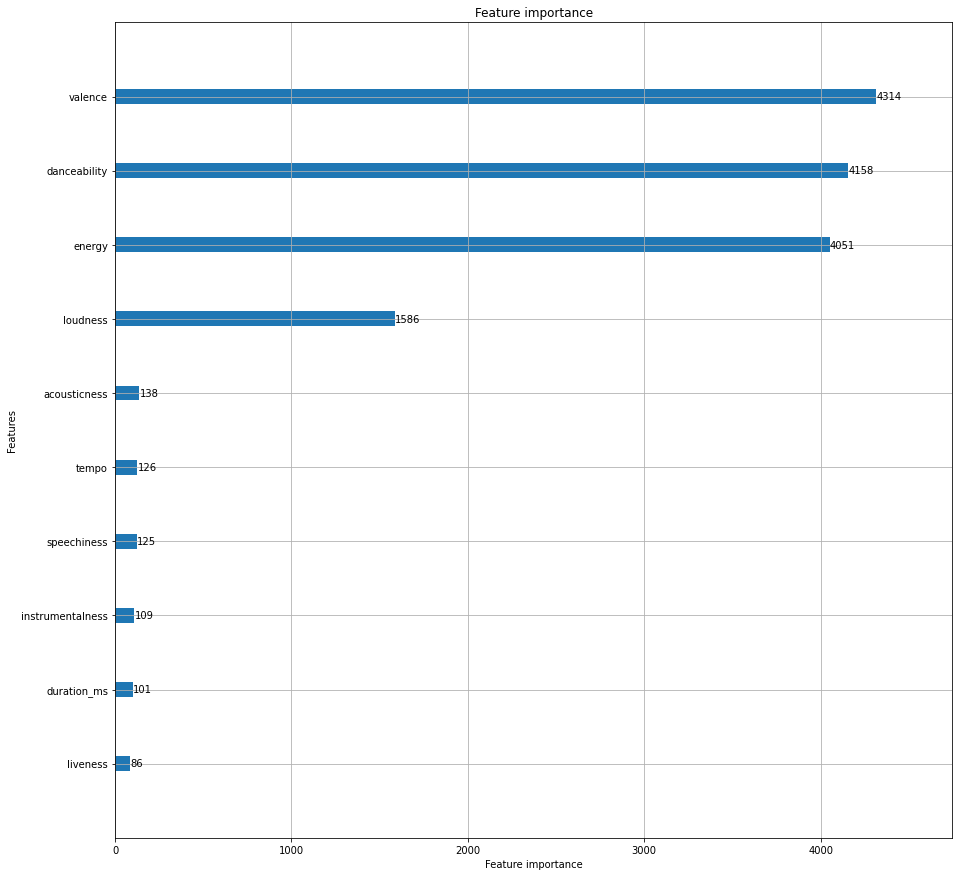

In [ ]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [ ]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_pickle("/content/drive/MyDrive/Aura/dataframe")

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Aura/dataframe")

In [ ]:
dataframe1.head()

,kmeans,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_name
87852,0,0.0686,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.393,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019,ily (i love you baby) (feat. Emilee)
87951,0,0.0264,['6ix9ine'],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.251,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020,GOOBA
87540,0,0.0847,['Travis Scott'],0.841,243837,0.728,1,6gBFPUFcJLzWGx4lenP6h2,0.000000,7,0.149,-3.370,1,goosebumps,92,2016-09-16,0.0484,130.049,0.430,2016,goosebumps
87970,0,0.0210,['Bad Bunny'],0.860,172127,0.758,0,0SqqAgdovOE24BzxIClpjw,0.000065,11,0.344,-5.160,1,Yo Perreo Sola,92,2020-02-28,0.0695,97.014,0.453,2020,Yo Perreo Sola
87843,0,0.0522,['Arizona Zervas'],0.621,163636,0.601,1,696DnlkuDOXcMAnKlTgXXK,0.000000,6,0.460,-5.616,0,ROXANNE,92,2019-10-10,0.1480,116.735,0.457,2019,ROXANNE


In [ ]:
df.head()

,kmeans,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_name
87852,0,0.0686,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.393,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019,ily (i love you baby) (feat. Emilee)
87951,0,0.0264,['6ix9ine'],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.251,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020,GOOBA
87540,0,0.0847,['Travis Scott'],0.841,243837,0.728,1,6gBFPUFcJLzWGx4lenP6h2,0.000000,7,0.149,-3.370,1,goosebumps,92,2016-09-16,0.0484,130.049,0.430,2016,goosebumps
87970,0,0.0210,['Bad Bunny'],0.860,172127,0.758,0,0SqqAgdovOE24BzxIClpjw,0.000065,11,0.344,-5.160,1,Yo Perreo Sola,92,2020-02-28,0.0695,97.014,0.453,2020,Yo Perreo Sola
87843,0,0.0522,['Arizona Zervas'],0.621,163636,0.601,1,696DnlkuDOXcMAnKlTgXXK,0.000000,6,0.460,-5.616,0,ROXANNE,92,2019-10-10,0.1480,116.735,0.457,2019,ROXANNE


In [ ]:
from keras.preprocessing.image import img_to_array
import imutils
from keras.models import load_model
import numpy as np
import cv2

In [ ]:
new = df[df['kmeans']==0]['song_name'].head(10)
arr = []
for ind in new.index:
  arr.append(df['song_name'][ind])

In [ ]:
from collections import defaultdict
  
  
# Defining a dict
d = defaultdict(list)
d[0].append(arr)
print(d)

In [ ]:
emotions=['angry','surprise','neutral','happy','sad']
emotions.index('neutral')

2

In [ ]:
def get_results(emotion_code):
  NUM_RECOMMEND=10
  happy_set=[]
  sad_set=[]
  angry_set=[]
  neutral_set=[]
  surprise_set=[]
  if emotion_code==0:
      angry_set.append(df[df['kmeans']==0]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(angry_set).T
  elif emotion_code==1:
      surprise_set.append(df[df['kmeans']==1]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(surprise_set).T
  elif emotion_code==2:
      neutral_set.append(df[df['kmeans']==2]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(neutral_set).T
  elif emotion_code==3:
      happy_set.append(df[df['kmeans']==3]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(happy_set).T
  else:
      sad_set.append(df[df['kmeans']==4]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(sad_set).T

In [ ]:
print(get_results(3))

                             song_name
87844                       Supalonely
87858                     Dance Monkey
87952  Rain On Me (with Ariana Grande)
87850                  Don't Start Now
87947     Savage Remix (feat. Beyoncé)
87969                       Boss Bitch
87909                             Tusa
87890                      Breaking Me
87944                     WHATS POPPIN
87977                          Safaera


In [ ]:
def get_results(emotion_code):
  NUM_RECOMMEND=10
  happy_set=[]
  sad_set=[]
  angry_set=[]
  neutral_set=[]
  surprise_set=[]
  if emotion_code==0:
      print(df[df['kmeans']==0]['song_name'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==0]['valence'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==0]['danceability'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==0]['loudness'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==0]['energy'].head(NUM_RECOMMEND))

  elif emotion_code==1:
      print(df[df['kmeans']==1]['song_name'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==1]['valence'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==1]['danceability'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==1]['loudness'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==1]['energy'].head(NUM_RECOMMEND))

  elif emotion_code==2:
      print(df[df['kmeans']==2]['song_name'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==2]['valence'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==2]['danceability'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==2]['loudness'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==2]['energy'].head(NUM_RECOMMEND))

  elif emotion_code==3:
      print(df[df['kmeans']==3]['song_name'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==3]['valence'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==3]['danceability'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==3]['loudness'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==3]['energy'].head(NUM_RECOMMEND))
  else:
      print(df[df['kmeans']==4]['song_name'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==4]['valence'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==4]['danceability'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==4]['loudness'].head(NUM_RECOMMEND))
      print(df[df['kmeans']==4]['energy'].head(NUM_RECOMMEND))

In [ ]:
get_results(0) #angry

87852    ily (i love you baby) (feat. Emilee)
87951                                   GOOBA
87540                              goosebumps
87970                          Yo Perreo Sola
87843                                 ROXANNE
87742                              SICKO MODE
87440                               Play Date
87957                   Be Kind (with Halsey)
87948                             After Party
87954              Life Is Good (feat. Drake)
Name: song_name, dtype: object
87852    0.330
87951    0.393
87540    0.430
87970    0.453
87843    0.457
87742    0.446
87440    0.446
87957    0.452
87948    0.453
87954    0.508
Name: valence, dtype: float64
87852    0.674
87951    0.611
87540    0.841
87970    0.860
87843    0.621
87742    0.834
87440    0.680
87957    0.630
87948    0.629
87954    0.676
Name: danceability, dtype: float64
87852   -7.567
87951   -5.688
87540   -3.370
87970   -5.160
87843   -5.616
87742   -3.714
87440   -5.077
87957   -7.088
87948   -8.045
87954   -

In [ ]:
get_results(1) #surprise

87949    death bed (coffee for your head) (feat. beabad...
87941                                           THE SCOTTS
87953                    Stuck with U (with Justin Bieber)
87945                                      Blueberry Faygo
87856                                    Someone You Loved
87989                             TKN (feat. Travis Scott)
87857                                  everything i wanted
88000                                             Skechers
87859       If the World Was Ending - feat. Julia Michaels
87955                     Chicago Freestyle (feat. Giveon)
Name: song_name, dtype: object
87949    0.3480
87941    0.2800
87953    0.5370
87945    0.3490
87856    0.4460
87989    0.4850
87857    0.2430
88000    0.2740
87859    0.6040
87955    0.0397
Name: valence, dtype: float64
87949    0.726
87941    0.716
87953    0.597
87945    0.774
87856    0.501
87989    0.776
87857    0.704
88000    0.903
87859    0.464
87955    0.735
Name: danceability, dtype: float64
8794

In [ ]:
get_results(2) #neutral

87863                                           bad guy
87846                      High Fashion (feat. Mustard)
87960                                Deep End Freestyle
87746     Sunflower - Spider-Man: Into the Spider-Verse
87916                                          I.F.L.Y.
116695                                       Ignorantes
87787                                          3 Nights
87769                                   This Is America
87756                           Going Bad (feat. Drake)
87753          Magic In The Hamptons (feat. Lil Yachty)
Name: song_name, dtype: object
87863     0.562
87846     0.511
87960     0.776
87746     0.913
87916     0.554
116695    0.505
87787     0.877
87769     0.549
87756     0.544
87753     0.803
Name: valence, dtype: float64
87863     0.701
87846     0.831
87960     0.876
87746     0.760
87916     0.812
116695    0.850
87787     0.815
87769     0.854
87756     0.889
87753     0.769
Name: danceability, dtype: float64
87863    -10.965
87846  

In [ ]:
get_results(3) #happy

87844                         Supalonely
87858                       Dance Monkey
87952    Rain On Me (with Ariana Grande)
87850                    Don't Start Now
87947       Savage Remix (feat. Beyoncé)
87969                         Boss Bitch
87909                               Tusa
87890                        Breaking Me
87944                       WHATS POPPIN
87977                            Safaera
Name: song_name, dtype: object
87844    0.817
87858    0.513
87952    0.646
87850    0.677
87947    0.636
87969    0.575
87909    0.574
87890    0.664
87944    0.826
87977    0.685
Name: valence, dtype: float64
87844    0.863
87858    0.824
87952    0.672
87850    0.794
87947    0.822
87969    0.707
87909    0.803
87890    0.789
87944    0.923
87977    0.607
Name: danceability, dtype: float64
87844   -4.689
87858   -6.400
87952   -3.764
87850   -4.521
87947   -4.772
87969   -4.593
87909   -3.280
87890   -5.652
87944   -6.671
87977   -4.074
Name: loudness, dtype: float64
87844    0.63

In [ ]:
get_results(4) #sad

87747                         lovely (with Khalid)
87870                        when the party's over
87653    Clean White Noise - Loopable with no fade
88039                          Lose You To Love Me
87772                Get You The Moon (feat. Snøw)
97788                               No Time To Die
97549                         Can We Kiss Forever?
87829                           You Are The Reason
87906                                   i love you
97445                  Dusk Till Dawn - Radio Edit
Name: song_name, dtype: object
87747    0.1200
87870    0.1980
87653    0.0000
88039    0.0978
87772    0.0895
97788    0.0517
97549    0.1240
87829    0.2180
87906    0.1200
97445    0.0967
Name: valence, dtype: float64
87747    0.351
87870    0.367
87653    0.000
88039    0.488
87772    0.498
97788    0.380
97549    0.522
87829    0.331
87906    0.421
97445    0.258
Name: danceability, dtype: float64
87747   -10.109
87870   -14.084
87653   -28.460
88039    -8.985
87772   -16.541
9778